# Counting Labels & Weighted Loss Function


In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("Desktop/work/data/nih/train-small.csv")

In [3]:
class_counts = train_df.sum().drop(['Image','PatientId'])


In [4]:
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


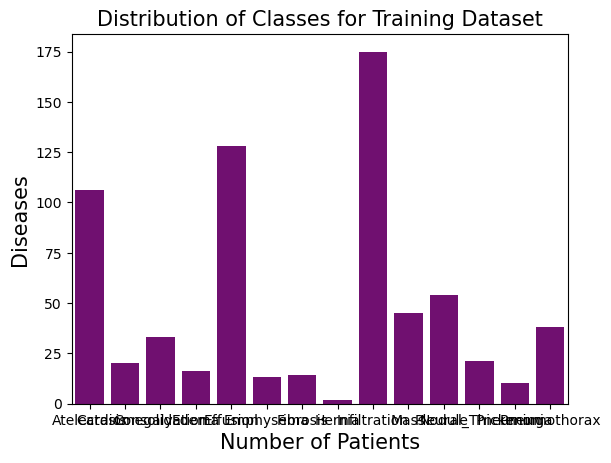

In [8]:
sns.barplot(x=class_counts.index, y=class_counts.values, color='purple')
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()

## 1. Weighted Loss Function

In [9]:
# Generate an array of 4 binary label values, 3 positive and 1 negative
y_true = np.array(
        [[1],
         [1],
         [1],
         [0]])
print(f"y_true: \n{y_true}")

y_true: 
[[1]
 [1]
 [1]
 [0]]


### 1.1 Understanding Weighted Loss Function

#### 1.1.1 Two Models

- Model 1 always outputs a 0.9 for any example that it's given.  
- Model 2 always outputs a 0.1 for any example that it's given.

In [10]:
# Make model predictions that are always 0.9 for all examples
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(f"y_pred_1: \n{y_pred_1}")
print()
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(f"y_pred_2: \n{y_pred_2}")

y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]

y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


### 1.2 Problems with the Regular Loss Function

The model that always outputs 0.9 has a smaller loss (performs better) than model 2 with regular loss function.

- This is because there is a class imbalance, where 3 out of the 4 labels are 1.
- If the data were perfectly balanced, (two labels were 1, and two labels were 0), model 1 and model 2 would have the same loss.  Each would get two examples correct and two examples incorrect.
- However, since the data is not balanced, the regular loss function implies that model 1 is better than model 2.

#### 1.2.1 Shortcomings of a Regular Non-weighted Loss


In [11]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_reg_1: {loss_reg_1:.4f}")

loss_reg_1: 2.6187


In [12]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.4f}")

loss_reg_2: 7.0131


In [13]:
print(f"When the model 1 always predicts 0.9, the regular loss is {loss_reg_1:.4f}")
print(f"When the model 2 always predicts 0.1, the regular loss is {loss_reg_2:.4f}")

When the model 1 always predicts 0.9, the regular loss is 2.6187
When the model 2 always predicts 0.1, the regular loss is 7.0131


The loss function gives a greater loss when the predictions are always 0.1, because the data is imbalanced, and has three labels of `1` but only one label for `0`.

Given a class imbalance with more positive labels, the regular loss function implies that the model with the higher prediction of 0.9 performs better than the model with the lower prediction of 0.1

### 1.3 Treatment by a Weighted Loss on the Two Models
 
- Notice how a prediction of 0.9 is 0.1 away from the positive label of 1.
- Also notice how a prediction of 0.1 is 0.1 away from the negative label of 0
- So model 1 and 2 are "symmetric" along the midpoint of 0.5, if you plot them on a number line between 0 and 1.

#### 1.3.1 Weighted Loss Equation
Calculate the loss for the zero-th label (column at index 0)

- The loss is made up of two terms.  To make it easier to read the code, you will calculate each of these terms separately.  We are giving each of these two terms a name for explanatory purposes, but these are not officially called $loss_{pos}$ or $loss_{neg}$

    - $loss_{pos}$: we'll use this to refer to the loss where the actual label is positive (the positive examples).
    - $loss_{neg}$: we'll use this to refer to the loss where the actual label is negative (the negative examples).  

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

Since this sample dataset is small enough, you can calculate the positive weight to be used in the weighted loss function.  To get the positive weight, count how many NEGATIVE labels are present, divided by the total number of examples.

In this case, there is one negative label, and four total examples.Similarly, the negative weight is the fraction of positive labels.


In [14]:
# positive weight as the fraction of negative labels
w_p = 1/4

# negative weight as the fraction of positive labels
w_n = 3/4

print(f"positive weight w_p: {w_p}")
print(f"negative weight w_n {w_n}")

positive weight w_p: 0.25
negative weight w_n 0.75


#### 1.3.2 Weighted Loss: Model 1

`loss_1_pos` and `loss_1_neg` are calculated using the `y_pred_1` predictions.

In [15]:
loss_1_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_1 ))
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.0790


In [16]:
loss_1_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_1 ))
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 1.7269


In [17]:
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.8060


#### 1.3.3 Weighted Loss: Model 2


In [18]:
loss_2_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_2))
print(f"loss_2_pos: {loss_2_pos:.4f}")

loss_2_pos: 1.7269


In [19]:
loss_2_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_2_neg: {loss_2_neg:.4f}")

loss_2_neg: 0.0790


In [20]:
loss_2 = loss_2_pos + loss_2_neg
print(f"loss_2: {loss_2:.4f}")

loss_2: 1.8060


#### 1.3.4 Comparing Model 1 and Model 2 Weighted Losses

In [21]:
print(f"When the model always predicts 0.9, the total loss is {loss_1:.4f}")
print(f"When the model always predicts 0.1, the total loss is {loss_2:.4f}")

When the model always predicts 0.9, the total loss is 1.8060
When the model always predicts 0.1, the total loss is 1.8060


In [22]:
print(f"loss_1_pos: {loss_1_pos:.4f} \t loss_1_neg: {loss_1_neg:.4f}")
print()
print(f"loss_2_pos: {loss_2_pos:.4f} \t loss_2_neg: {loss_2_neg:.4f}")

loss_1_pos: 0.0790 	 loss_1_neg: 1.7269

loss_2_pos: 1.7269 	 loss_2_neg: 0.0790


Even though there is a class imbalance, where there are 3 positive labels but only one negative label, the weighted loss accounts for this by giving more weight to the negative label than to the positive label.

## 2. Weighted Loss for More than One Class


In [23]:
y_true = np.array(
        [[1,0],
         [1,0],
         [1,0],
         [1,0],
         [0,1]
        ])
y_true

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

### 2.1 Choosing axis=0 or axis=1

In [24]:
# when you set axis=0
print(f"using axis = 0 {np.sum(y_true,axis=0)}")

# when you set axis=1
print(f"using axis = 1 {np.sum(y_true,axis=1)}")

using axis = 0 [4 1]
using axis = 1 [1 1 1 1 1]


if you choose `axis=0`, the sum is taken for each of the two columns.  This is what you want to do in this case. If you set `axis=1`, the sum is taken for each row.

### 2.2 Calculate the Weights

In [25]:
# set the positive weights as the fraction of negative labels (0) for each class (each column)
w_p = np.sum(y_true == 0,axis=0) / y_true.shape[0]
w_p

array([0.2, 0.8])

In [26]:
# set the negative weights as the fraction of positive labels (1) for each class
w_n = np.sum(y_true == 1, axis=0) / y_true.shape[0]
w_n

array([0.8, 0.2])

In [27]:
# Set model predictions where all predictions are the same
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
y_pred

array([[0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7]])

In this case, there are two classes.

Start by calculating the loss for class `0`.

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

In [28]:
# Print and view column zero of the weight
print(f"w_p[0]: {w_p[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_p[0]: 0.2
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [29]:
# calculate the loss from the positive predictions, for class 0
loss_0_pos = -1 * np.sum(w_p[0] * 
                y_true[:, 0] * 
                np.log(y_pred[:, 0])
              )
print(f"loss_0_pos: {loss_0_pos:.4f}")

loss_0_pos: 0.9632


In [30]:
# Print and view column zero of the weight
print(f"w_n[0]: {w_n[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_n[0]: 0.8
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [31]:
# Calculate the loss from the negative predictions, for class 0
loss_0_neg = -1 * np.sum( 
                w_n[0] * 
                (1 - y_true[:, 0]) * 
                np.log(1 - y_pred[:, 0])
              )
print(f"loss_0_neg: {loss_0_neg:.4f}")

loss_0_neg: 0.2853


In [32]:
# add the two loss terms to get the total loss for class 0
loss_0 = loss_0_neg + loss_0_pos
print(f"loss_0: {loss_0:.4f}")

loss_0: 1.2485


In [36]:
# calculate the loss from the positive predictions, for class 1
loss_1_pos = -1 * np.sum(w_p[1] * 
                y_true[:, 1] * 
                np.log(y_pred[:, 1])
              )
print(f"loss_1_pos: {loss_1_pos:.4f}") 

loss_1_pos: 0.2853


In [37]:
# Calculate the loss from the negative predictions, for class 1
loss_1_neg = -1 * np.sum( 
                w_n[1] * 
                (1 - y_true[:, 1]) * 
                np.log(1 - y_pred[:, 1])
              )
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 0.9632


In [38]:
# add the two loss terms to get the total loss for class 1
loss_1 = loss_1_pos+loss_1_neg
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.2485
